In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../')
import utilities


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
df = pd.read_csv("valued_SPY.csv", index_col=0)

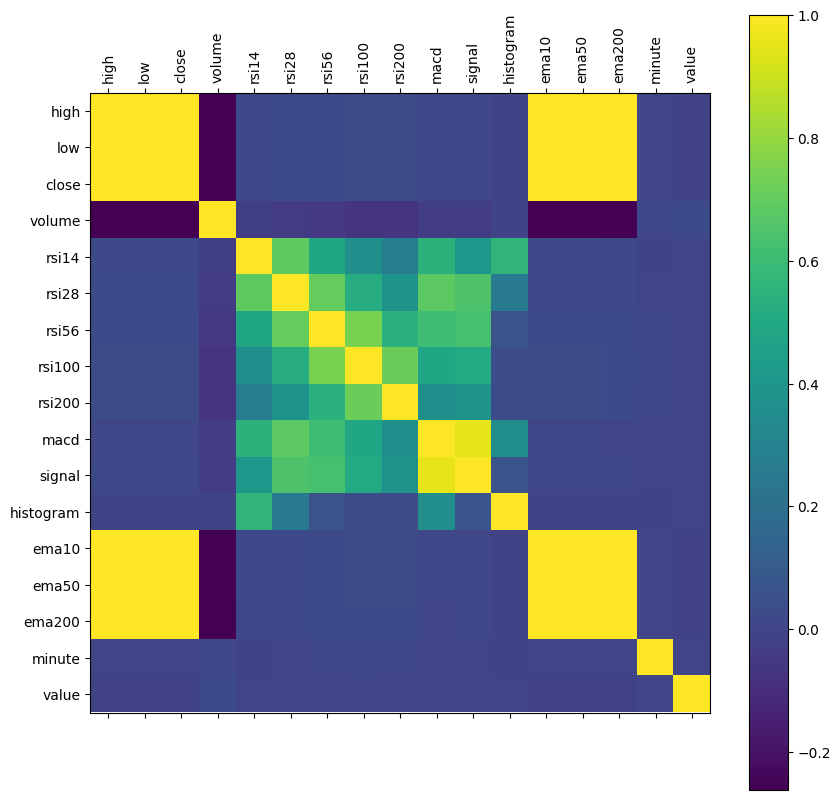

In [18]:
# show the correlation matrix
correlation_matrix = df.corr()
plt.matshow(correlation_matrix)

plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.colorbar()
plt.gcf().set_size_inches(10, 10)

plt.show()

In [19]:
df.describe()

,high,low,close,volume,rsi14,rsi28,rsi56,rsi100,rsi200,macd,signal,histogram,ema10,ema50,ema200,minute,value
count,1.873694e+06,1.873694e+06,1.873694e+06,1.873694e+06,1.873694e+06,1.873694e+06,1.873694e+06,1.873650e+06,1.873550e+06,1.873694e+06,1.873694e+06,1.873694e+06,1.873694e+06,1.873694e+06,1.873551e+06,1.873694e+06,1.871745e+06
mean,3.605643e-01,3.605945e-01,3.606593e-01,9.119904e-03,5.053783e-01,5.001069e-01,5.262207e-01,5.129882e-01,3.783051e-01,4.129931e-01,4.339243e-01,4.689376e-01,3.606761e-01,3.608362e-01,3.612988e-01,4.994650e-01,4.353984e-01
std,2.579818e-01,2.579134e-01,2.579568e-01,1.271474e-02,1.612635e-01,1.219542e-01,1.113354e-01,1.069713e-01,8.145672e-02,2.018796e-02,2.201346e-02,1.883264e-02,2.581981e-01,2.585099e-01,2.594339e-01,2.892940e-01,3.547887e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.486039e-01,1.487044e-01,1.487408e-01,2.516572e-03,3.896100e-01,4.139454e-01,4.490194e-01,4.392334e-01,3.226662e-01,4.065256e-01,4.268477e-01,4.624328e-01,1.485392e-01,1.484234e-01,1.480955e-01,2.487179e-01,8.209338e-02
50%,2.934597e-01,2.935185e-01,2.935920e-01,4.995427e-03,5.053760e-01,5.008949e-01,5.267275e-01,5.132960e-01,3.778111e-01,4.134450e-01,4.344227e-01,4.688494e-01,2.935333e-01,2.935876e-01,2.937386e-01,5.000000e-01,3.755772e-01
75%,5.143952e-01,5.143942e-01,5.144757e-01,1.053554e-02,6.214437e-01,5.864110e-01,6.038593e-01,5.867949e-01,4.332298e-01,4.199386e-01,4.415423e-01,4.753757e-01,5.146251e-01,5.149848e-01,5.160930e-01,7.487179e-01,7.865572e-01
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,9.994869e-01


In [23]:
import numpy as np

from keras import models
from keras import layers

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df.dropna(inplace=True)

features = df.drop(columns='value')
target = df['value']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(X_train, y_train, epochs=1, batch_size=32, validation_data=(X_test, y_test))



46790/46790 [==============================] - 20s 416us/step - loss: 0.1258 - mae: 0.3178 - val_loss: 0.1247 - val_mae: 0.3162


In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

y_pred = model.predict(X_test)

11698/11698 [==============================] - 3s 275us/step


In [30]:
# desccribe the y_pred
print(pd.Series(y_pred.flatten()).describe())

count    374321.000000
mean          0.432222
std           0.037918
min           0.250312
25%           0.404468
50%           0.429288
75%           0.451916
max           0.920158
dtype: float64


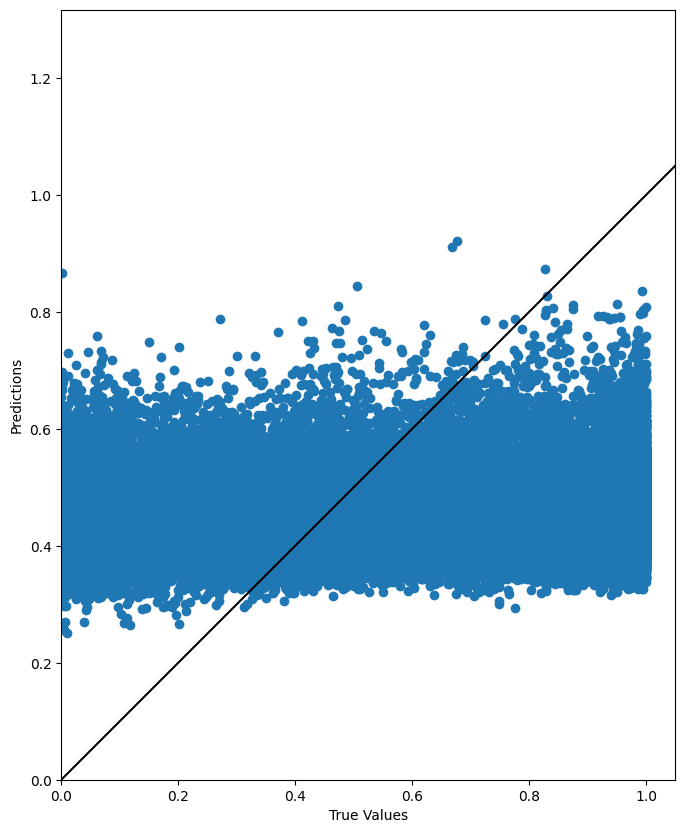

In [34]:
# scatter plot of the predicted vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])

# make the plot larger
plt.gcf().set_size_inches(10, 10)



In [ ]:
# Analyze the dataset, and then what the model did

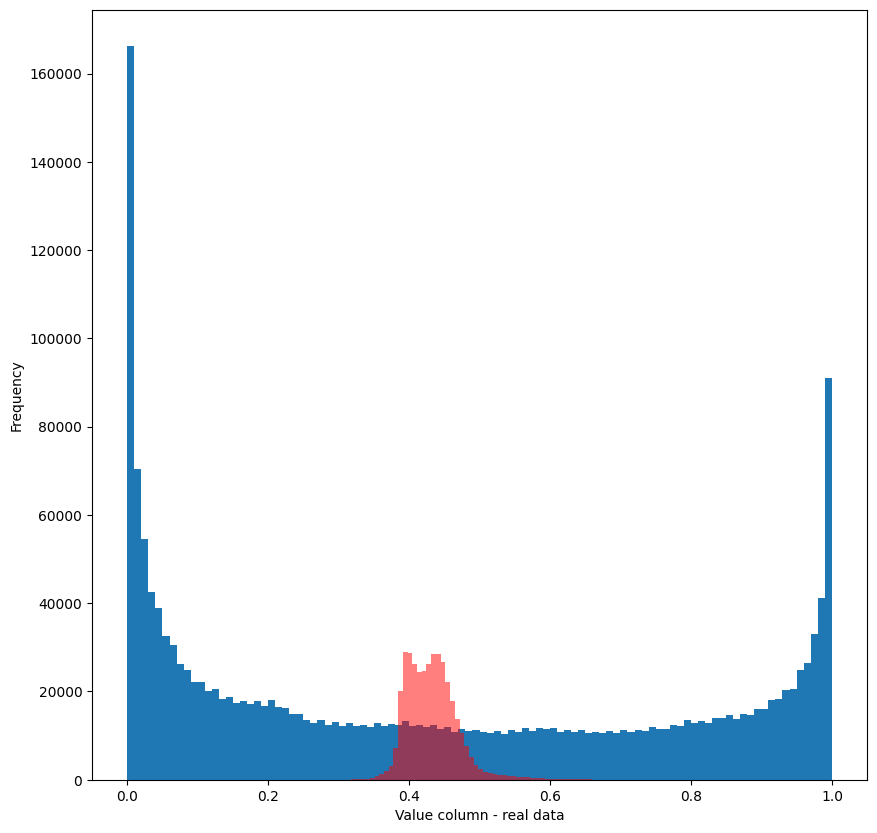

In [39]:
# histogram of the value column
plt.hist(df['value'], bins=100)
plt.xlabel('Value column - real data')
plt.ylabel('Frequency')
plt.gcf().set_size_inches(10, 10)

# overlay the predicted values on the histogram in red
plt.hist(y_pred, bins=100, alpha=0.5, color='red')
plt.xlabel('Value column - real data')
plt.ylabel('Frequency')
plt.gcf().set_size_inches(10, 10)

